In [64]:
from sklearn.externals import joblib
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
#Load in many slice predictions
predictions_combined_real= np.load('misc_files/predictions_combined_real_data.npy')
predictions_combined_sim_train= np.load('misc_files/predictions_combined_train.npy')
predictions_combined_sim_val= np.load('misc_files/predictions_combined_val.npy')

#Load in GT classifications 
gt_classification_real = np.load('../data/real/dwi/y_manual.npy')
gt_classification_sim_train = np.load('misc_files/y_train.npy')
gt_classification_sim_val = np.load('misc_files/y_val.npy')

#svm_classifier = joblib.load('misc_files/svm_classifier.pkl') 
#rf_classifier = joblib.load('misc_files/rf_classifier.pkl') 

svm_classifier = SVC(kernel='linear',probability=True)
svm_classifier.fit(predictions_combined_sim_train,gt_classifcaiton_sim_train)

#make classifications
classification_real = svm_classifier.predict(predictions_combined_real) 
classification_sim_train = svm_classifier.predict(predictions_combined_sim_train) 
classification_sim_val = svm_classifier.predict(predictions_combined_sim_val) 

#try out new classifications
classification_sim_val_new = np.mean(predictions_combined_sim_val,axis=1) > 0.5 
#classification_sim_test_new = np.mean(predictions_combined_sim_test,axis=1) > 0.5 
classification_real_new = np.mean(predictions_combined_real,axis=1) > 0.5 


print('Validation set:\n',confusion_matrix(gt_classification_sim_val,classification_sim_val_new))
#print('Test set:\n',confusion_matrix(gt_classification_sim_test,classification_sim_test_new))
print('Real set:\n',confusion_matrix(gt_classification_real==2,classification_real_new))


Validation set:
 [[157   6]
 [ 11  42]]
Real set:
 [[93 54]
 [ 8 17]]


In [98]:
#Get probabilities 
probabilties_sim_val = svm_classifier.predict_proba(predictions_combined_sim_val)
probabilties_real = svm_classifier.predict_proba(predictions_combined_real)

y_val = gt_classification_real == 2
y_pred_val = classification_real

ind_true_pos = [indx for indx,y in enumerate(y_val) if (y_val[indx] == 1) and (y_pred_val[indx] == 1) ]
ind_true_neg = [indx for indx,y in enumerate(y_val) if (y_val[indx] == 0) and (y_pred_val[indx] == 0) ]
ind_false_neg = [indx for indx,y in enumerate(y_val) if (y_val[indx] == 1) and (y_pred_val[indx] == 0) ]
ind_false_pos = [indx for indx,y in enumerate(y_val) if (y_val[indx] == 0) and (y_pred_val[indx] == 1) ]



IndexError: list index out of range

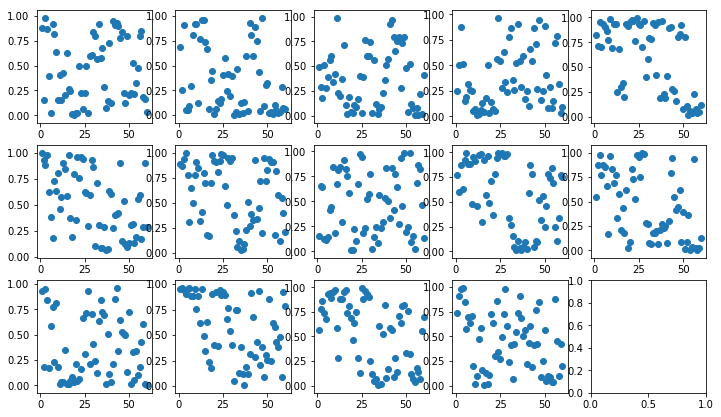

In [120]:
x = np.linspace(1,60,60)

fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.scatter(x,predictions_combined_real[ind_false_neg[i],:])